In [1]:
import os 

import acquire

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from env import get_connection

from scipy.stats import mannwhitneyu

from scipy import stats


In [2]:
db_url = get_connection('iris_db')

query = '''
        SELECT * 
        FROM measurements
        '''

In [3]:
df_iris = pd.read_sql(query, db_url)
df_iris.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1


In [4]:
df_iris.to_csv('initial_iris.csv', index = 0)

In [5]:
df_iris.shape

(150, 6)

In [6]:
df_iris.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id'],
      dtype='object')

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [8]:
df_iris.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [9]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv'

df_google = pd.read_csv(url)

df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df_google.shape

(891, 12)

In [11]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_google.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
df_google.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df_google.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df_google.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df_excel = pd.read_excel('train.xlsx')

In [19]:
df_excel_sample = df_excel.loc[:100]
df_excel_sample.shape

(101, 12)

In [20]:
df_excel.shape

(891, 12)

In [21]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [22]:
df_excel.select_dtypes(include='object').columns


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [23]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df_excel.select_dtypes(include=('int', 'float')).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [25]:
range_c = df_excel.describe().T
range_c.head()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.500,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000,3.0,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.000,0.0,1.0,8.0


In [26]:
(range_c['max']) - (range_c['min'])

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [27]:
t = acquire.get_titanic_data()
t.head()

found data


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [28]:
tt = acquire.get_telco_data()
tt.head()

found data


,contract_type_id,contract_type,customer_id,contract_type_id.1,paperless_billing,customer_id.1,churn_month,customer_id.2,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,1,Month-to-month,3308-MHOOC,1,Yes,NaN,NaN,3308-MHOOC,Male,0,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,None,2,Mailed check
1,1,Month-to-month,3307-TLCUD,1,No,NaN,NaN,3307-TLCUD,Male,0,...,Yes,No,Yes,No,No,No,1,DSL,2,Mailed check
2,1,Month-to-month,3301-LSLWQ,1,Yes,NaN,NaN,3301-LSLWQ,Female,0,...,Yes,No,No,No,No,Yes,1,DSL,1,Electronic check
3,1,Month-to-month,3296-SILRA,1,Yes,3296-SILRA,2022-01-31,3296-SILRA,Female,1,...,No,Yes,No,No,No,No,2,Fiber optic,2,Mailed check
4,1,Month-to-month,3295-YVUSR,1,Yes,NaN,NaN,3295-YVUSR,Male,1,...,No,No,No,No,No,No,2,Fiber optic,2,Mailed check


In [29]:
i = acquire.get_iris_data()
i.head()

found data


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


Data Prep Exercises

Use the function defined in acquire.py to load the iris data.

In [30]:
df1 = acquire.get_iris_data()
df1.head()

found data


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


Drop the species_id and measurement_id columns.

In [31]:
df1 = df1.drop(columns = ['species_id', 'measurement_id'])


In [32]:
df1 = df1.drop(columns = 'species_id.1')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Rename the species_name column to just species.

In [33]:
df1 = df1.rename(columns = {'species_name': 'species'})
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
def prep_iris(df):
    
    df = df.drop(columns = ['species_id', 'measurement_id', 'species_id.1']).rename(columns = {'species_name': 'species'})

    return df

In [35]:
df = acquire.get_iris_data()
prep_iris(df).head()

found data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Using the Titanic dataset

Use the function defined in acquire.py to load the Titanic data.

In [36]:
df = acquire.get_titanic_data()
df.head()

found data


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


Drop any unnecessary, unhelpful, or duplicated columns.

In [37]:
df = df.drop(columns = ['passenger_id', 'pclass', 'embarked'])
df.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,1


Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [38]:
def prep_titanic(df):
    
    df = df.drop(columns = ['passenger_id', 'pclass', 'embarked'])
    
    return df

In [39]:
df = acquire.get_titanic_data()
prep_titanic(df).head()

found data


,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,1


Use the function defined in acquire.py to load the Telco data.

In [40]:
df = acquire.get_telco_data()
df.head()

found data


,contract_type_id,contract_type,customer_id,contract_type_id.1,paperless_billing,customer_id.1,churn_month,customer_id.2,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,1,Month-to-month,3308-MHOOC,1,Yes,NaN,NaN,3308-MHOOC,Male,0,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,None,2,Mailed check
1,1,Month-to-month,3307-TLCUD,1,No,NaN,NaN,3307-TLCUD,Male,0,...,Yes,No,Yes,No,No,No,1,DSL,2,Mailed check
2,1,Month-to-month,3301-LSLWQ,1,Yes,NaN,NaN,3301-LSLWQ,Female,0,...,Yes,No,No,No,No,Yes,1,DSL,1,Electronic check
3,1,Month-to-month,3296-SILRA,1,Yes,3296-SILRA,2022-01-31,3296-SILRA,Female,1,...,No,Yes,No,No,No,No,2,Fiber optic,2,Mailed check
4,1,Month-to-month,3295-YVUSR,1,Yes,NaN,NaN,3295-YVUSR,Male,1,...,No,No,No,No,No,No,2,Fiber optic,2,Mailed check


In [41]:
df.shape

(7043, 32)

In [42]:
for col in df.columns:
    
    print(df[col].value_counts())
    print()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

3308-MHOOC    1
9804-ICWBG    1
9777-WJJPR    1
9779-DPNEJ    1
9780-FKVVF    1
             ..
5449-FIBXJ    1
5453-AXEPF    1
5461-QKNTN    1
5468-BPMMO    1
9916-AYHTC    1
Name: customer_id, Length: 7043, dtype: int64

1    3875
3    1695
2    1473
Name: contract_type_id.1, dtype: int64

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

3296-SILRA    1
6330-JKLPC    1
6481-OGDOO    1
6532-YLWSI    1
6275-YDUVO    1
             ..
0917-EZOLA    1
1043-YCUTE    1
1150-WFARN    1
1447-PJGGA    1
9907-SWKKF    1
Name: customer_id.1, Length: 1869, dtype: int64

2022-01-31    1869
Name: churn_month, dtype: int64

3308-MHOOC    1
9804-ICWBG    1
9777-WJJPR    1
9779-DPNEJ    1
9780-FKVVF    1
             ..
5449-FIBXJ    1
5453-AXEPF    1
5461-QKNTN    1
5468-BPMMO    1
9916-AYHTC    1
Name: customer_id.2

In [43]:
df.isna().sum()

contract_type_id                 0
contract_type                    0
customer_id                      0
contract_type_id.1               0
paperless_billing                0
customer_id.1                 5174
churn_month                   5174
customer_id.2                    0
gender                           0
senior_citizen                   0
partner                          0
dependents                       0
customer_id.3                    0
payment_type_id                  0
monthly_charges                  0
total_charges                    0
customer_id.4                    0
signup_date                      0
customer_id.5                    0
phone_service                    0
multiple_lines                   0
internet_service_type_id         0
online_security                  0
online_backup                    0
device_protection                0
tech_support                     0
streaming_tv                     0
streaming_movies                 0
internet_service_typ

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   contract_type_id            7043 non-null   int64  
 1   contract_type               7043 non-null   object 
 2   customer_id                 7043 non-null   object 
 3   contract_type_id.1          7043 non-null   int64  
 4   paperless_billing           7043 non-null   object 
 5   customer_id.1               1869 non-null   object 
 6   churn_month                 1869 non-null   object 
 7   customer_id.2               7043 non-null   object 
 8   gender                      7043 non-null   object 
 9   senior_citizen              7043 non-null   int64  
 10  partner                     7043 non-null   object 
 11  dependents                  7043 non-null   object 
 12  customer_id.3               7043 non-null   object 
 13  payment_type_id             7043 

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [45]:
df = df.drop(columns = ['contract_type_id', 'contract_type_id.1', 'customer_id.1', 'customer_id.2', 'customer_id.3', 'customer_id.4', 'customer_id.5', 'internet_service_type_id', 'internet_service_type_id.1', 'contract_type_id', 'contract_type_id.1', 'payment_type_id', 'payment_type_id.1'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_type          7043 non-null   object 
 1   customer_id            7043 non-null   object 
 2   paperless_billing      7043 non-null   object 
 3   churn_month            1869 non-null   object 
 4   gender                 7043 non-null   object 
 5   senior_citizen         7043 non-null   int64  
 6   partner                7043 non-null   object 
 7   dependents             7043 non-null   object 
 8   monthly_charges        7043 non-null   float64
 9   total_charges          7043 non-null   object 
 10  signup_date            7043 non-null   object 
 11  phone_service          7043 non-null   object 
 12  multiple_lines         7043 non-null   object 
 13  online_security        7043 non-null   object 
 14  online_backup          7043 non-null   object 
 15  devi

In [47]:
df.isna().sum()

contract_type               0
customer_id                 0
paperless_billing           0
churn_month              5174
gender                      0
senior_citizen              0
partner                     0
dependents                  0
monthly_charges             0
total_charges               0
signup_date                 0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
internet_service_type       0
payment_type                0
dtype: int64

Encode the categorical columns.

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [48]:
def prep_telco(df):
    
    df = df.drop(columns = ['contract_type_id', 'contract_type_id.1', 'customer_id.1', 'customer_id.2', 'customer_id.3', 'customer_id.4', 'customer_id.5', 'internet_service_type_id', 'internet_service_type_id.1', 'contract_type_id', 'contract_type_id.1', 'payment_type_id', 'payment_type_id.1'])
    
    return df

In [49]:
df = acquire.get_telco_data()

prep_telco(df).head()

found data


,contract_type,customer_id,paperless_billing,churn_month,gender,senior_citizen,partner,dependents,monthly_charges,total_charges,...,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type,payment_type
0,Month-to-month,3308-MHOOC,Yes,NaN,Male,0,No,Yes,19.2,19.2,...,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,None,Mailed check
1,Month-to-month,3307-TLCUD,No,NaN,Male,0,Yes,No,34.4,592.75,...,No,No phone service,Yes,No,Yes,No,No,No,DSL,Mailed check
2,Month-to-month,3301-LSLWQ,Yes,NaN,Female,0,No,No,66.1,1912.15,...,Yes,Yes,Yes,No,No,No,No,Yes,DSL,Electronic check
3,Month-to-month,3296-SILRA,Yes,2022-01-31,Female,1,Yes,No,76.4,76.4,...,Yes,No,No,Yes,No,No,No,No,Fiber optic,Mailed check
4,Month-to-month,3295-YVUSR,Yes,NaN,Male,1,No,No,72.6,154.3,...,Yes,Yes,No,No,No,No,No,No,Fiber optic,Mailed check


Split your data

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [50]:
def train_val_test(df, strat, seed = 42):
    
    train, val_test = train_test_split(df, train_size = 0.7,
                                       random_state = seed,
                                       stratify = df[strat])
    
    val, test = train_test_split(val_test, train_size = 0.5,
                                 random_state = seed,
                                 stratify = val_test[strat])
    
    return train, val, test

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [51]:
ftrain, fval, ftest = train_val_test(df1, 'species')

In [52]:
ftrain.species.value_counts(normalize = True)

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

In [53]:
fval.species.value_counts(normalize = True)

setosa        0.363636
versicolor    0.318182
virginica     0.318182
Name: species, dtype: float64

In [54]:
ftest.species.value_counts(normalize = True)

virginica     0.347826
versicolor    0.347826
setosa        0.304348
Name: species, dtype: float64

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [55]:
df = acquire.get_titanic_data()
df = prep_titanic(df)

found data


In [56]:
ftrain, fval, ftest = train_val_test(df, 'survived')

In [57]:
ftrain.survived.value_counts(normalize = True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [58]:
fval.survived.value_counts(normalize = True)

0    0.61194
1    0.38806
Name: survived, dtype: float64

In [59]:
ftest.survived.value_counts(normalize = True)

0    0.619403
1    0.380597
Name: survived, dtype: float64

Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [60]:
df = acquire.get_telco_data()
df.head()

found data


,contract_type_id,contract_type,customer_id,contract_type_id.1,paperless_billing,customer_id.1,churn_month,customer_id.2,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,1,Month-to-month,3308-MHOOC,1,Yes,NaN,NaN,3308-MHOOC,Male,0,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,None,2,Mailed check
1,1,Month-to-month,3307-TLCUD,1,No,NaN,NaN,3307-TLCUD,Male,0,...,Yes,No,Yes,No,No,No,1,DSL,2,Mailed check
2,1,Month-to-month,3301-LSLWQ,1,Yes,NaN,NaN,3301-LSLWQ,Female,0,...,Yes,No,No,No,No,Yes,1,DSL,1,Electronic check
3,1,Month-to-month,3296-SILRA,1,Yes,3296-SILRA,2022-01-31,3296-SILRA,Female,1,...,No,Yes,No,No,No,No,2,Fiber optic,2,Mailed check
4,1,Month-to-month,3295-YVUSR,1,Yes,NaN,NaN,3295-YVUSR,Male,1,...,No,No,No,No,No,No,2,Fiber optic,2,Mailed check


In [61]:
df = prep_telco(df)
df.head()

,contract_type,customer_id,paperless_billing,churn_month,gender,senior_citizen,partner,dependents,monthly_charges,total_charges,...,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type,payment_type
0,Month-to-month,3308-MHOOC,Yes,NaN,Male,0,No,Yes,19.2,19.2,...,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,None,Mailed check
1,Month-to-month,3307-TLCUD,No,NaN,Male,0,Yes,No,34.4,592.75,...,No,No phone service,Yes,No,Yes,No,No,No,DSL,Mailed check
2,Month-to-month,3301-LSLWQ,Yes,NaN,Female,0,No,No,66.1,1912.15,...,Yes,Yes,Yes,No,No,No,No,Yes,DSL,Electronic check
3,Month-to-month,3296-SILRA,Yes,2022-01-31,Female,1,Yes,No,76.4,76.4,...,Yes,No,No,Yes,No,No,No,No,Fiber optic,Mailed check
4,Month-to-month,3295-YVUSR,Yes,NaN,Male,1,No,No,72.6,154.3,...,Yes,Yes,No,No,No,No,No,No,Fiber optic,Mailed check


In [62]:
ftrain, fval, ftest = train_val_test(df, 'churn')

KeyError: 'churn'

## Eploratory Analysis

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [63]:
df = acquire.get_iris_data()
df.head()

found data


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [64]:
df = prep_iris(df)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
train, val, test = train_val_test(df, 'species')

train.shape, val.shape, test.shape

((105, 5), (22, 5), (23, 5))

In [66]:
train.species.value_counts(normalize = True)

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

In [67]:
val.species.value_counts(normalize = True)

setosa        0.363636
versicolor    0.318182
virginica     0.318182
Name: species, dtype: float64

In [68]:
test.species.value_counts(normalize = True)

virginica     0.347826
versicolor    0.347826
setosa        0.304348
Name: species, dtype: float64

In [69]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
68,6.2,2.2,4.5,1.5,versicolor
19,5.1,3.8,1.5,0.3,setosa
143,6.8,3.2,5.9,2.3,virginica
99,5.7,2.8,4.1,1.3,versicolor


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [70]:
q_mask = train.dtypes == 'float64'

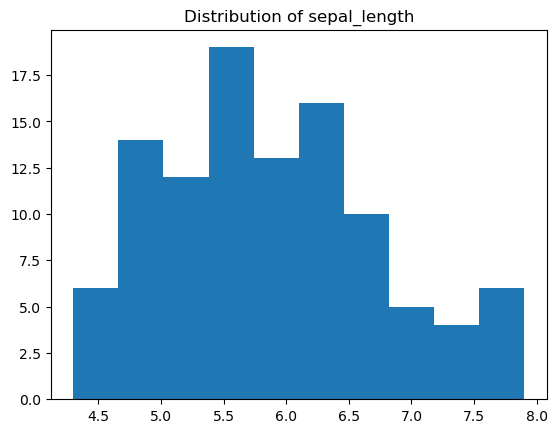

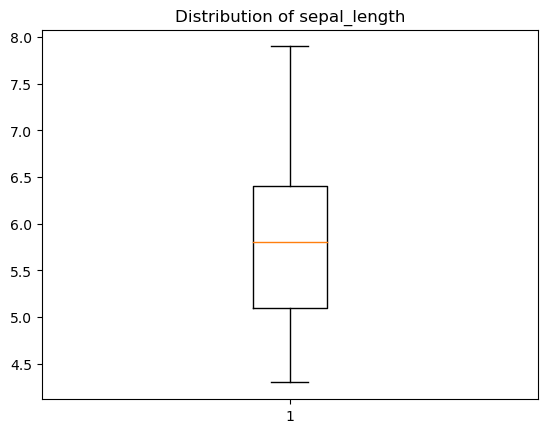

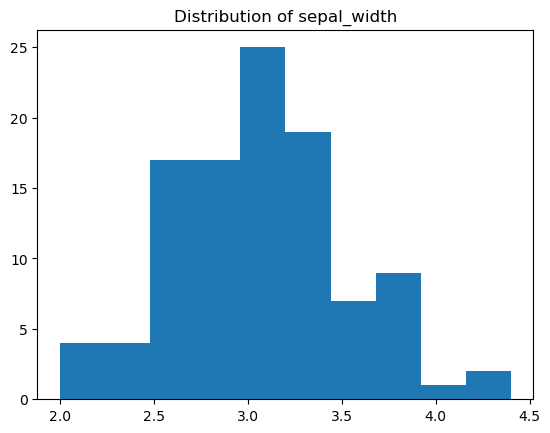

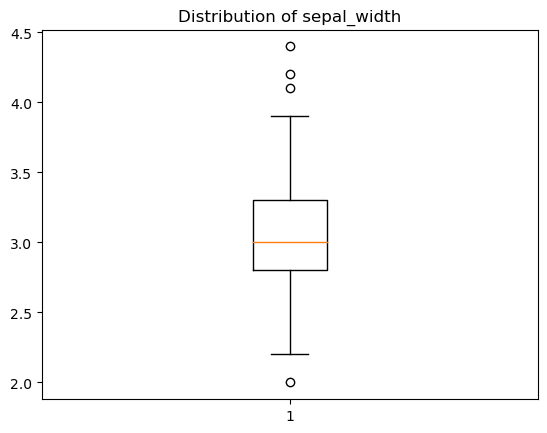

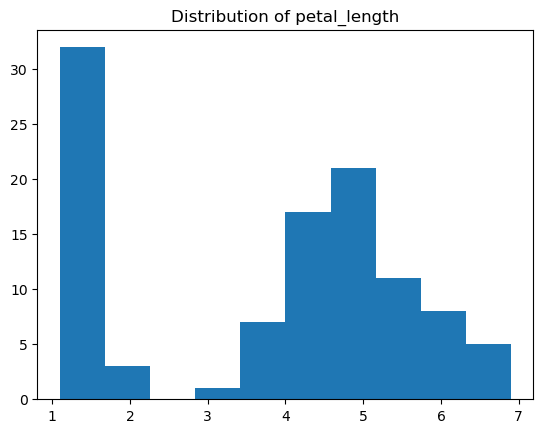

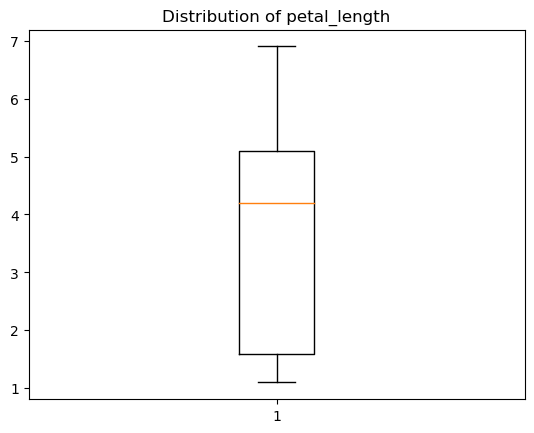

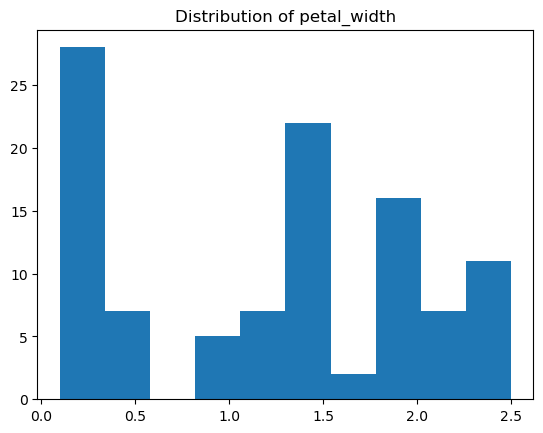

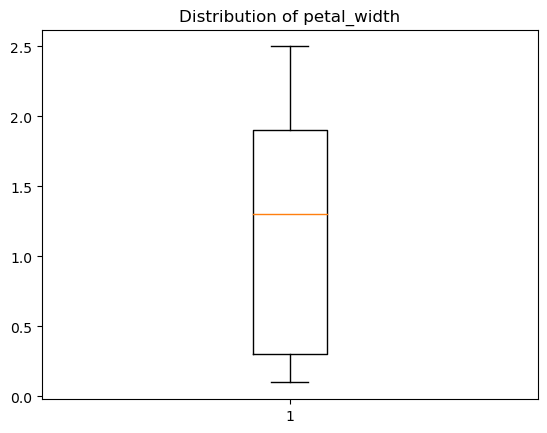

In [71]:
for col in train.columns[q_mask]:
    
    plt.figure()
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.figure()
    plt.boxplot(train[col])
    #f-string to specify the name of columns
    plt.title(f'Distribution of {col}')

In [72]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.055238,3.784762,1.205714
std,0.862941,0.457203,1.784052,0.777549
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.900000
max,7.900000,4.400000,6.900000,2.500000


For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [73]:
f_table = train.species.value_counts()
f_table

versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64

<BarContainer object of 3 artists>

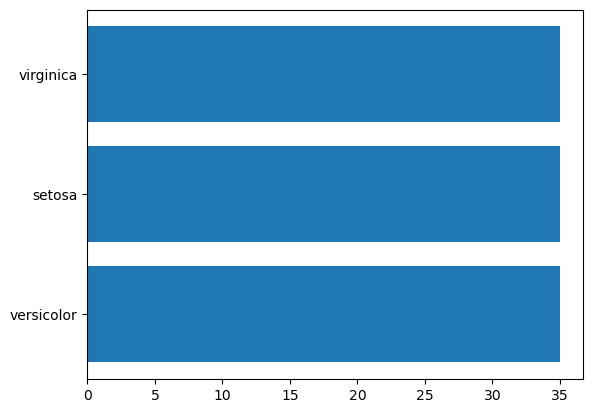

In [74]:
plt.barh(f_table.index, f_table)

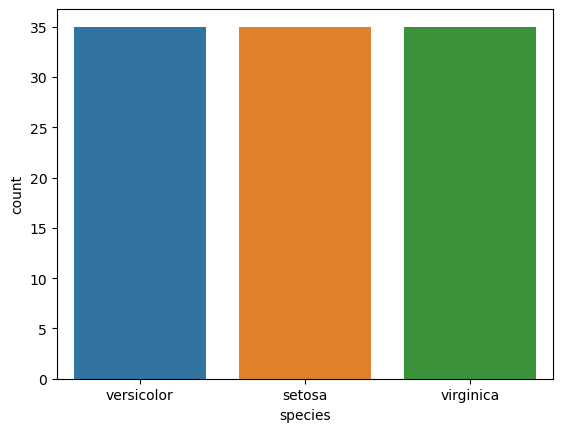

In [75]:
sns.countplot(data = train, x = 'species')
plt.show()

Document takeaways & any actions.

there are the same amount of species wich is 35

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [76]:
for col in train.columns[q_mask]:
    
    print(col, round(train[col].mean(), 2))

sepal_length 5.87
sepal_width 3.06
petal_length 3.78
petal_width 1.21


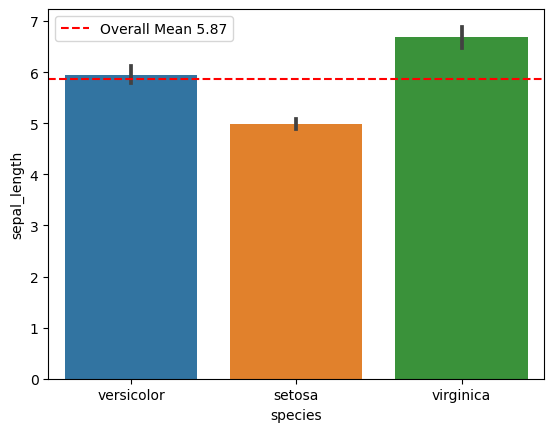

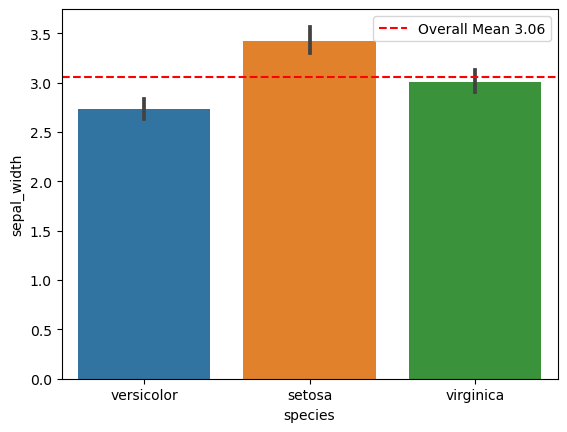

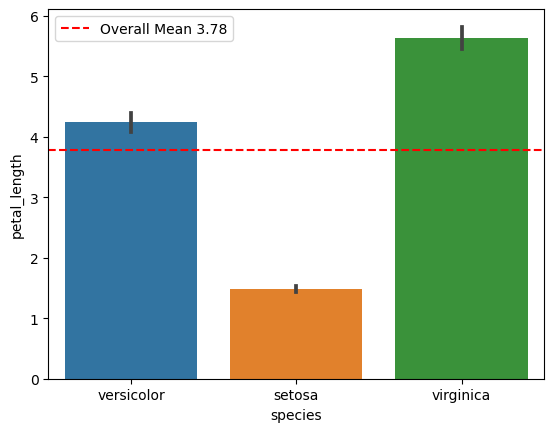

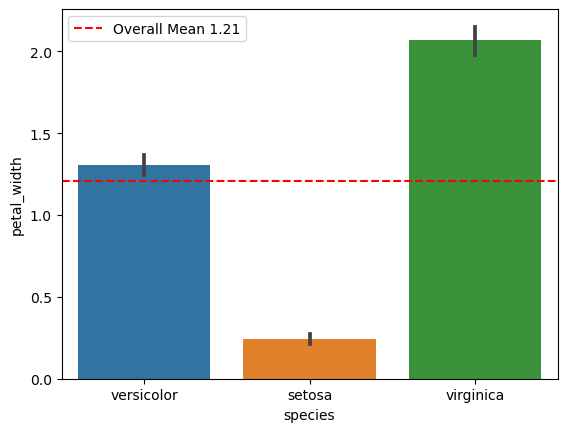

In [77]:
for col in train.columns[q_mask]:
    
    plt.figure()
    sns.barplot(data = train,  x = 'species', y = train[col])
    
    mean = train[col].mean()
    plt.axhline(y = mean, color = 'red', linestyle='--', label = f'Overall Mean {round(mean, 2)}')
    plt.legend()

For each measurement type, compute the descriptive statistics for each species.

In [78]:
for col in train.columns[q_mask]:
    
    print(col, train[col].describe())
    print()

sepal_length count    105.000000
mean       5.873333
std        0.862941
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

sepal_width count    105.000000
mean       3.055238
std        0.457203
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

petal_length count    105.000000
mean       3.784762
std        1.784052
min        1.100000
25%        1.600000
50%        4.200000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

petal_width count    105.000000
mean       1.205714
std        0.777549
min        0.100000
25%        0.300000
50%        1.300000
75%        1.900000
max        2.500000
Name: petal_width, dtype: float64



For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [79]:
vi = train[train.species == 'virginica'].petal_width

In [80]:
ve = train[train.species == 'versicolor'].petal_width

In [81]:
U1, p = mannwhitneyu(vi, ve)
U1, p

(1215.0, 1.2684064129030708e-12)

Document takeaways & any actions.

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [82]:
sns.color_palette('rocket')

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

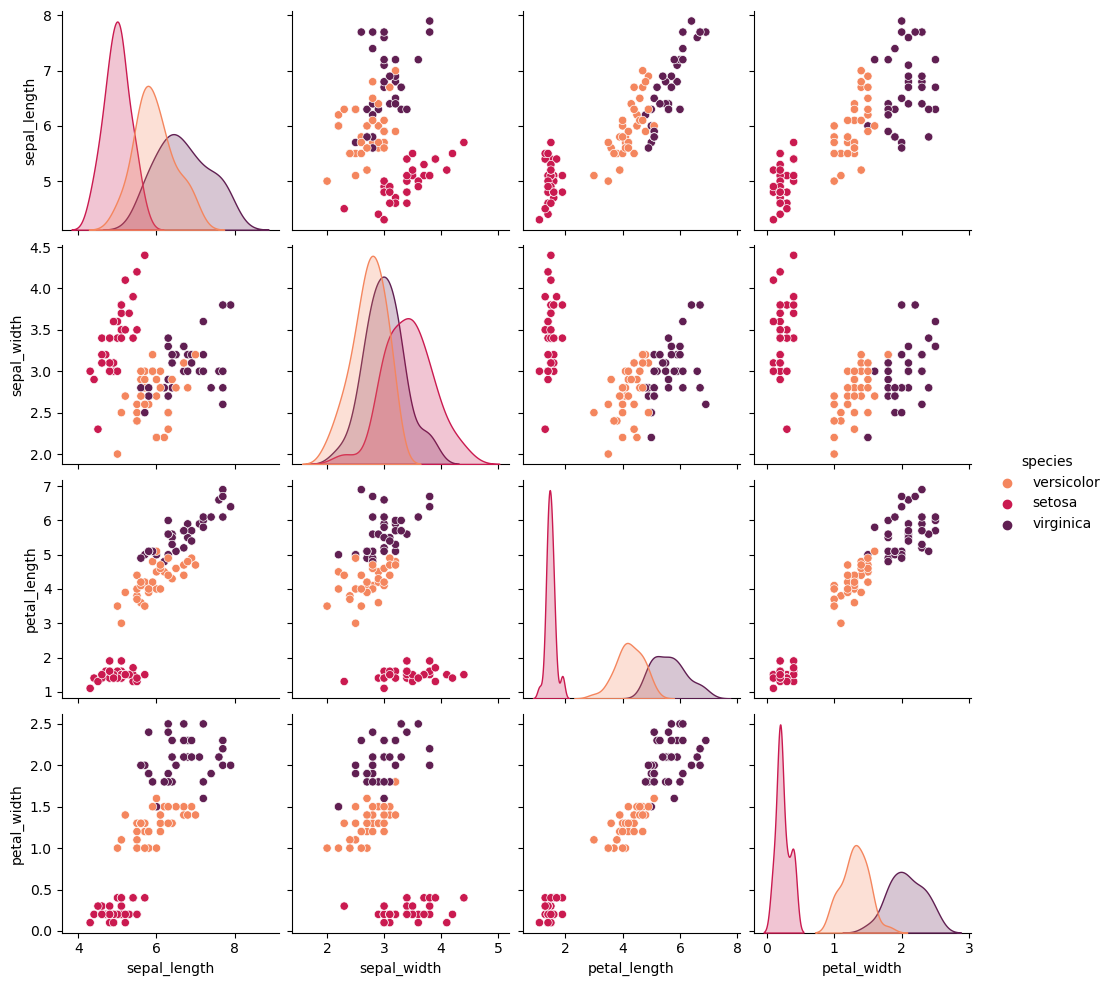

In [83]:
sns.pairplot(train, hue = 'species', palette = 'rocket_r')
plt.show()

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

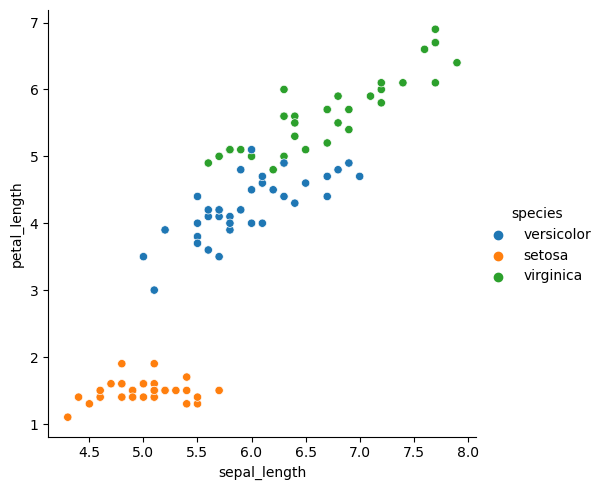

In [84]:
sns.relplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'species')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [85]:
q_mask.index

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [86]:
melted_df = pd.melt(train, id_vars=['species'], 
                    value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], 
                    var_name='num_var', value_name='measurement')

print(melted_df)


        species       num_var  measurement
0    versicolor  sepal_length          5.1
1    versicolor  sepal_length          6.2
2        setosa  sepal_length          5.1
3     virginica  sepal_length          6.8
4    versicolor  sepal_length          5.7
..          ...           ...          ...
415      setosa   petal_width          0.1
416  versicolor   petal_width          1.0
417      setosa   petal_width          0.2
418  versicolor   petal_width          1.3
419      setosa   petal_width          0.2

[420 rows x 3 columns]


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='num_var', ylabel='measurement'>

/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


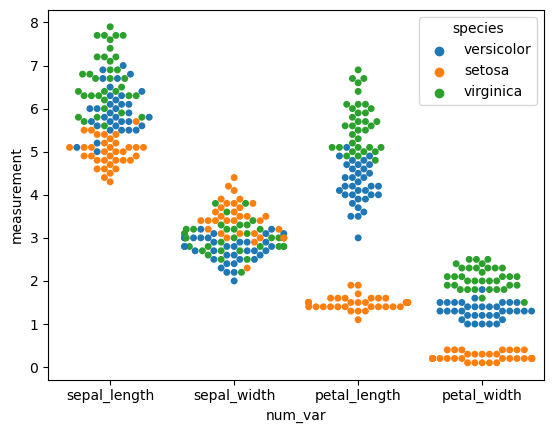

In [87]:
sns.swarmplot(data = melted_df, x = 'num_var', y = 'measurement', hue = 'species')

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Ho: the sepal area is not signficantly different in virginica compared to setosa

Ha: the sepal area is signficantly different in virginica compared to setosa

In [127]:
s_area = (train[train.species == 'setosa'].sepal_length)*(train[train.species == 'setosa'].sepal_width)
s_area.head()

19    19.38
9     15.19
46    19.38
8     12.76
1     14.70
dtype: float64

In [100]:
vi_area = (train[train.species == 'virginica'].sepal_length)*(train[train.species == 'virginica'].sepal_width)
vi_area.max()

30.02

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


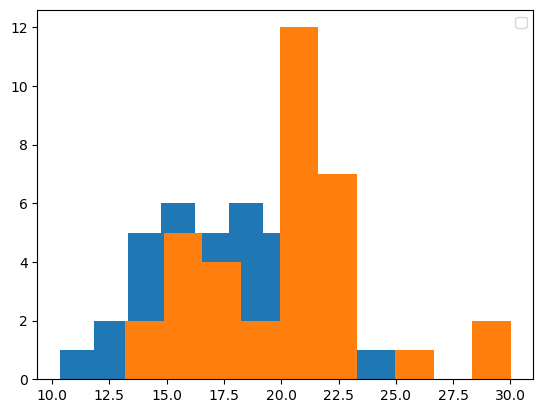

In [139]:
plt.hist(s_area)
plt.hist(vi_area)
plt.legend()

In [90]:
t, p = stats.ttest_ind(vi_area, s_area)
t, p

(3.6874046646250633, 0.0004515272846521485)

In [91]:
acquire.eval_p(p)

the result is significant we reject the null hypothesis with a p_value of 0.0.


Document takeaways and any actions.